# NLP PROJET 2

## Project: Data Exploration and NLP Modeling
### Deadline: January 22, 2024
Scraping and data exploration

In this second project, you will be tasked with preparing a database by collecting information from various sources, such as customer review sites, articles on cybersecurity, etc.
We can scrap these websites

https://fr.trustpilot.com/

yelp (with api)

https://www.opinion-assurances.fr/

you also can find a website (please validate with your teacher)

You can also use this dataset : https://drive.google.com/file/d/1_kg5JzAzntzLI6eGM3_vmUSoeWk7f8ip/view?usp=sharing


You will then undertake an initial exploration of the data, including data cleaning, visualization, and the production of initial conclusions. This step is crucial to establish a solid foundation for subsequent projects.


### Supervised learning

In the second phase, supervised learning and unsupervised learning will be utilized. You will need to create a supervised text processing model using NLP techniques. In addition to modeling, you will need to develop an interactive application where users can submit text in the chosen theme and receive a prediction, along with explanations for that prediction. This will allow you to apply your NLP skills in a practical manner.

- Examples of supervised tasks
- Sentiment analysis
- Number of stars
- Categories/subjects
- for insurance reviews for examples, claims, subscriptions, etc.
- for restaurants, type of dish, service vs. food
- Streamlit applications
- For one review, give detailed information (food, service, etc.) cf Amazon review
- For one restaurant, a summary about this restaurant, more detailed criteria
- For restaurants, QA system : “I want very good and expensive sushi”, “restaurant rapide et bon”

### Scoring

- Web scraping : 2 points
- Data Cleaning: 2 points (negative points if not well-executed)
    - Highlighting frequent words (and n-grams)
    - Spelling correction: 2 points
- Summary, Translation, and Generation: 2 points
    - Produce a clean file with multiple cleaned columns and corrected/translated texts
- Sentiment Analysis (multiclass, or binary classification): 2 points (possible negative points)
- Topic Modeling and Lists of Topics: 2 points
- Embedding to Identify Similar Words and Enrich Theme List: 2 points (possible negative points)
    - Word2Vec Training: 2 points, GloVe: 1 points
    - Visualization of embeddings with Matplotlib and Tensorboard: 2 points
    - Implementation of Euclidean or cosine distance: 1 point
    - Question answering with semantic search : bonus 2 points
- Supervised Learning, each model well-made and well-presented: 2 points (possible negative points)
    - TF-IDF and classical ML
    - Basic model with an embedding layer (embedding visualization with Tensorboard: additional 1 point)
    - Model with pre-trained embeddings (embedding visualization with Tensorboard: additional 1 point)
    - USE (Universal Sentence Embedding) or equivalents, RNN LSTM, CNN, BERT, or other models on Hugging Face
    - ChatGPT
- Results Interpretation (possible negative points)
    - Error analysis: 1 point
    - Sentiment detection: 2 points
    - Classical models with themes: 2 points
    - Deep learning models for words: 2 points
- Creation of Streamlit applications
    - Prediction (2 points)
    - Summary (2 points)
    - Explanation (3 points)
    - Information Retrieval  (3 points)
    - RAG (3 points)
    - QA (3 points)
- Clarity of Presentation: 2 points (possible negative points)

You can use this template : 
https://docs.google.com/presentation/d/1hyaVKY31U0wP4kensljOgIiudkRC5N1OxZMWqZ07Y5Q/edit?usp=sharing

Template en français
https://docs.google.com/presentation/d/1LGq58zA_5Usmqkz043iHYe3VqDrbQOARXUl_QWD_W3Y/edit?usp=sharing





In [1]:
import pandas as pd

reviews_df=pd.read_csv('reviews.csv', sep=';')

In [2]:
reviews_df.head()

,business_id,review_id,text,rating,corrected_text,translated_text
0,-0iLH7iQNYtoURciDpJf6w,tsubL1mtNvOD1MBSj2ls0Q,Perfect diary share the food of this family to...,5,Perfect diary share the food of this family to...,Perfect diary share the food of this family to...
1,-0iLH7iQNYtoURciDpJf6w,sxEFkJ89kyF-wMDUI2ZnWw,Based on the menu presented one could write a ...,5,"Based on the menu presented, one could write a...",Based on the menu presented one could write a ...
2,-0iLH7iQNYtoURciDpJf6w,3MYKaD-tDrUVhRgDh9G4dA,If you love French OnIon Soup this is for you ...,5,"If you love French OnIon Soup, this is for you...",If you love French OnIon Soup this is for you ...
3,IU9_wVOGBKjfqTTpAXpKcQ,PJuWhEzKFz3ipwhOcWMMBA,Came here with my daughter son inlaw his mom ...,5,"Came here with my daughter, son in law, and mo...",Came here with my daughter son inlaw his mom ...
4,IU9_wVOGBKjfqTTpAXpKcQ,sMcLY9Gpg9ToKqce2MiccQ,Just a few steps from our hotel we had wanted ...,4,"Just a few steps from our hotel, we had wanted...",Just a few steps from our hotel we had wanted ...


In [4]:
reviews_df.groupby('rating').count()
reviews_df.shape

(1234, 6)

In [39]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Charger le tokenizer et le modèle
tokenizer = AutoTokenizer.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")
model = AutoModelForSequenceClassification.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")

# Créer une pipeline d'analyse de sentiment
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

def analyze_sentiment(text):
    # Effectuer l'analyse de sentiment
    result = sentiment_analysis(text)

    # Récupérer le label (POSITIF ou NEGATIF) et le transformer en positif/négatif/neutre
    label = result[0]['label']
    return label

# Appliquer l'analyse de sentiment à chaque avis
reviews_df['sentiment'] = reviews_df['translated_text'].apply(analyze_sentiment)

# Afficher les résultats
print(reviews_df[['translated_text', 'sentiment']].head())



                                     translated_text sentiment
0  Perfect diary share the food of this family to...  positive
1  Based on the menu presented one could write a ...  positive
2  If you love French OnIon Soup this is for you ...  positive
3  Came here with my daughter son inlaw  his mom ...  positive
4  Just a few steps from our hotel we had wanted ...  negative


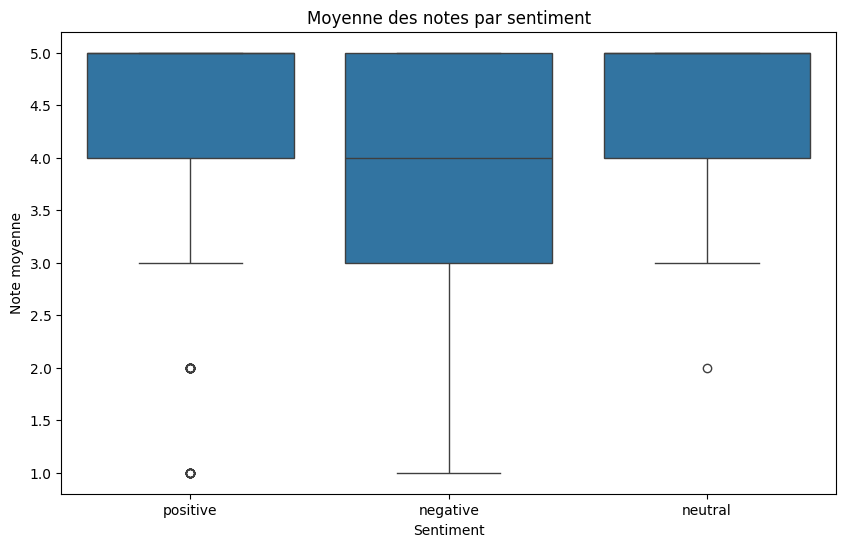

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création d'un graphique pour visualiser les notes par rapport aux sentiments
plt.figure(figsize=(10, 6))

# Utiliser Seaborn pour créer un diagramme en barres
sns.boxplot(x='sentiment', y='rating', data=reviews_df)

# Personnaliser le graphique
plt.title('Moyenne des notes par sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Note moyenne')

# Afficher le graphique
plt.show()


In [41]:
import gensim
from gensim import corpora
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()

# Prétraitement du texte
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

# Appliquer le prétraitement à chaque critique
processed_docs = reviews_df['translated_text'].map(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sraps\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sraps\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

for alpha in [0.01, 0.1,0.3, 0.5,0.7, 1]:
    for beta in [0.01, 0.1,0.03, 0.5, 0.7,1]:
        lda_model = gensim.models.LdaMulticore(corpus, num_topics=4, id2word=dictionary, passes=7, alpha=alpha, eta=beta)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        print(f'Alpha: {alpha}, Beta: {beta}, Coherence: {coherence_lda}')


Alpha: 0.01, Beta: 0.01, Coherence: 0.20598268312867712
Alpha: 0.01, Beta: 0.1, Coherence: 0.22736272139746855
Alpha: 0.01, Beta: 0.03, Coherence: 0.22289455886112966
Alpha: 0.01, Beta: 0.5, Coherence: 0.2088303305925308
Alpha: 0.01, Beta: 0.7, Coherence: 0.2459042997749596
Alpha: 0.01, Beta: 1, Coherence: 0.22715336734893918
Alpha: 0.1, Beta: 0.01, Coherence: 0.22699129505542084
Alpha: 0.1, Beta: 0.1, Coherence: 0.21818027760742892
Alpha: 0.1, Beta: 0.03, Coherence: 0.2108920080635275
Alpha: 0.1, Beta: 0.5, Coherence: 0.2003316782996099
Alpha: 0.1, Beta: 0.7, Coherence: 0.2288543152450509
Alpha: 0.1, Beta: 1, Coherence: 0.22510351236334952
Alpha: 0.3, Beta: 0.01, Coherence: 0.22525973885850914
Alpha: 0.3, Beta: 0.1, Coherence: 0.20069011565827527
Alpha: 0.3, Beta: 0.03, Coherence: 0.2266094767627046
Alpha: 0.3, Beta: 0.5, Coherence: 0.208316351474737
Alpha: 0.3, Beta: 0.7, Coherence: 0.20238821584299663
Alpha: 0.3, Beta: 1, Coherence: 0.21909481195612412
Alpha: 0.5, Beta: 0.01, Cohere

KeyboardInterrupt: 

In [ ]:
#! pip install pyldavis

In [ ]:
import gensim
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Création du modèle LDA avec la meilleure combinaison de cohérence (alpha=0.5, beta=1)
lda_model_best = gensim.models.LdaMulticore(corpus, num_topics=4, id2word=dictionary, passes=10, alpha=0.5, eta=1)

# Préparation des données pour pyLDAvis
lda_vis = gensimvis.prepare(lda_model_best, corpus, dictionary)

# Affichage de la visualisation
pyLDAvis.display(lda_vis)


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Joindre les tokens pour TF-IDF
processed_texts = [" ".join(doc) for doc in processed_docs]

# Créer la matrice TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
tfidf = tfidf_vectorizer.fit_transform(processed_texts)


In [48]:
from sklearn.decomposition import NMF

# Nombre de sujets
n_topics = 3

# Création du modèle NMF
nmf_model = NMF(n_components=n_topics, random_state=123)
nmf_W = nmf_model.fit_transform(tfidf)
nmf_H = nmf_model.components_

# Afficher les sujets et leurs mots clés
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_H):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))


Topic #0:
great food service delicious amazing excellent ambiance wine recommend experience
Topic #1:
paris restaurant place one dinner first meal reservation best time
Topic #2:
good friendly staff nice place really food french like menu
